In [1]:
import pandas as pd
import numpy as np 
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
import os, datetime, sys, random, time
import seaborn as sns
#import xgboost as xgs
#import lightgbm as lgb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend import classifier
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats, special
import shap
#import catboost as ctb

# Exploratory Data Analysis

In [2]:
df_train = pd.read_csv("data/cs-training.csv")
df_test = pd.read_csv("data/cs-test.csv")

df_train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
df_train.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [4]:
train = df_train.copy()


In [5]:
test = df_test.copy()

In [6]:
print(train.shape)
print(test.shape)

(150000, 12)
(101503, 12)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [9]:
train = train.drop('Unnamed: 0', axis = 1)


In [10]:
test = test.drop('Unnamed: 0', axis = 1)

In [11]:
test.drop('SeriousDlqin2yrs', axis = 1, inplace = True)

## NOTE
- For both train and test sets there null values for columns: MonthlyIncome, and NumberOfDependents

In [12]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


We will look at the percentage of positive to negative class in our training set

In [13]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [14]:
train['SeriousDlqin2yrs'].value_counts(normalize=True) * 100

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64

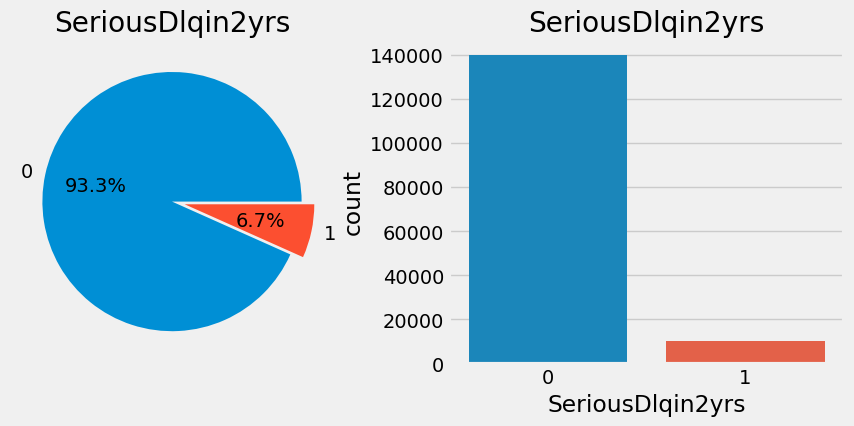

In [15]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
train['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('SeriousDlqin2yrs')
axes[0].set_ylabel('')
sns.countplot(x = 'SeriousDlqin2yrs',data=train,ax=axes[1])
axes[1].set_title('SeriousDlqin2yrs')
plt.show()

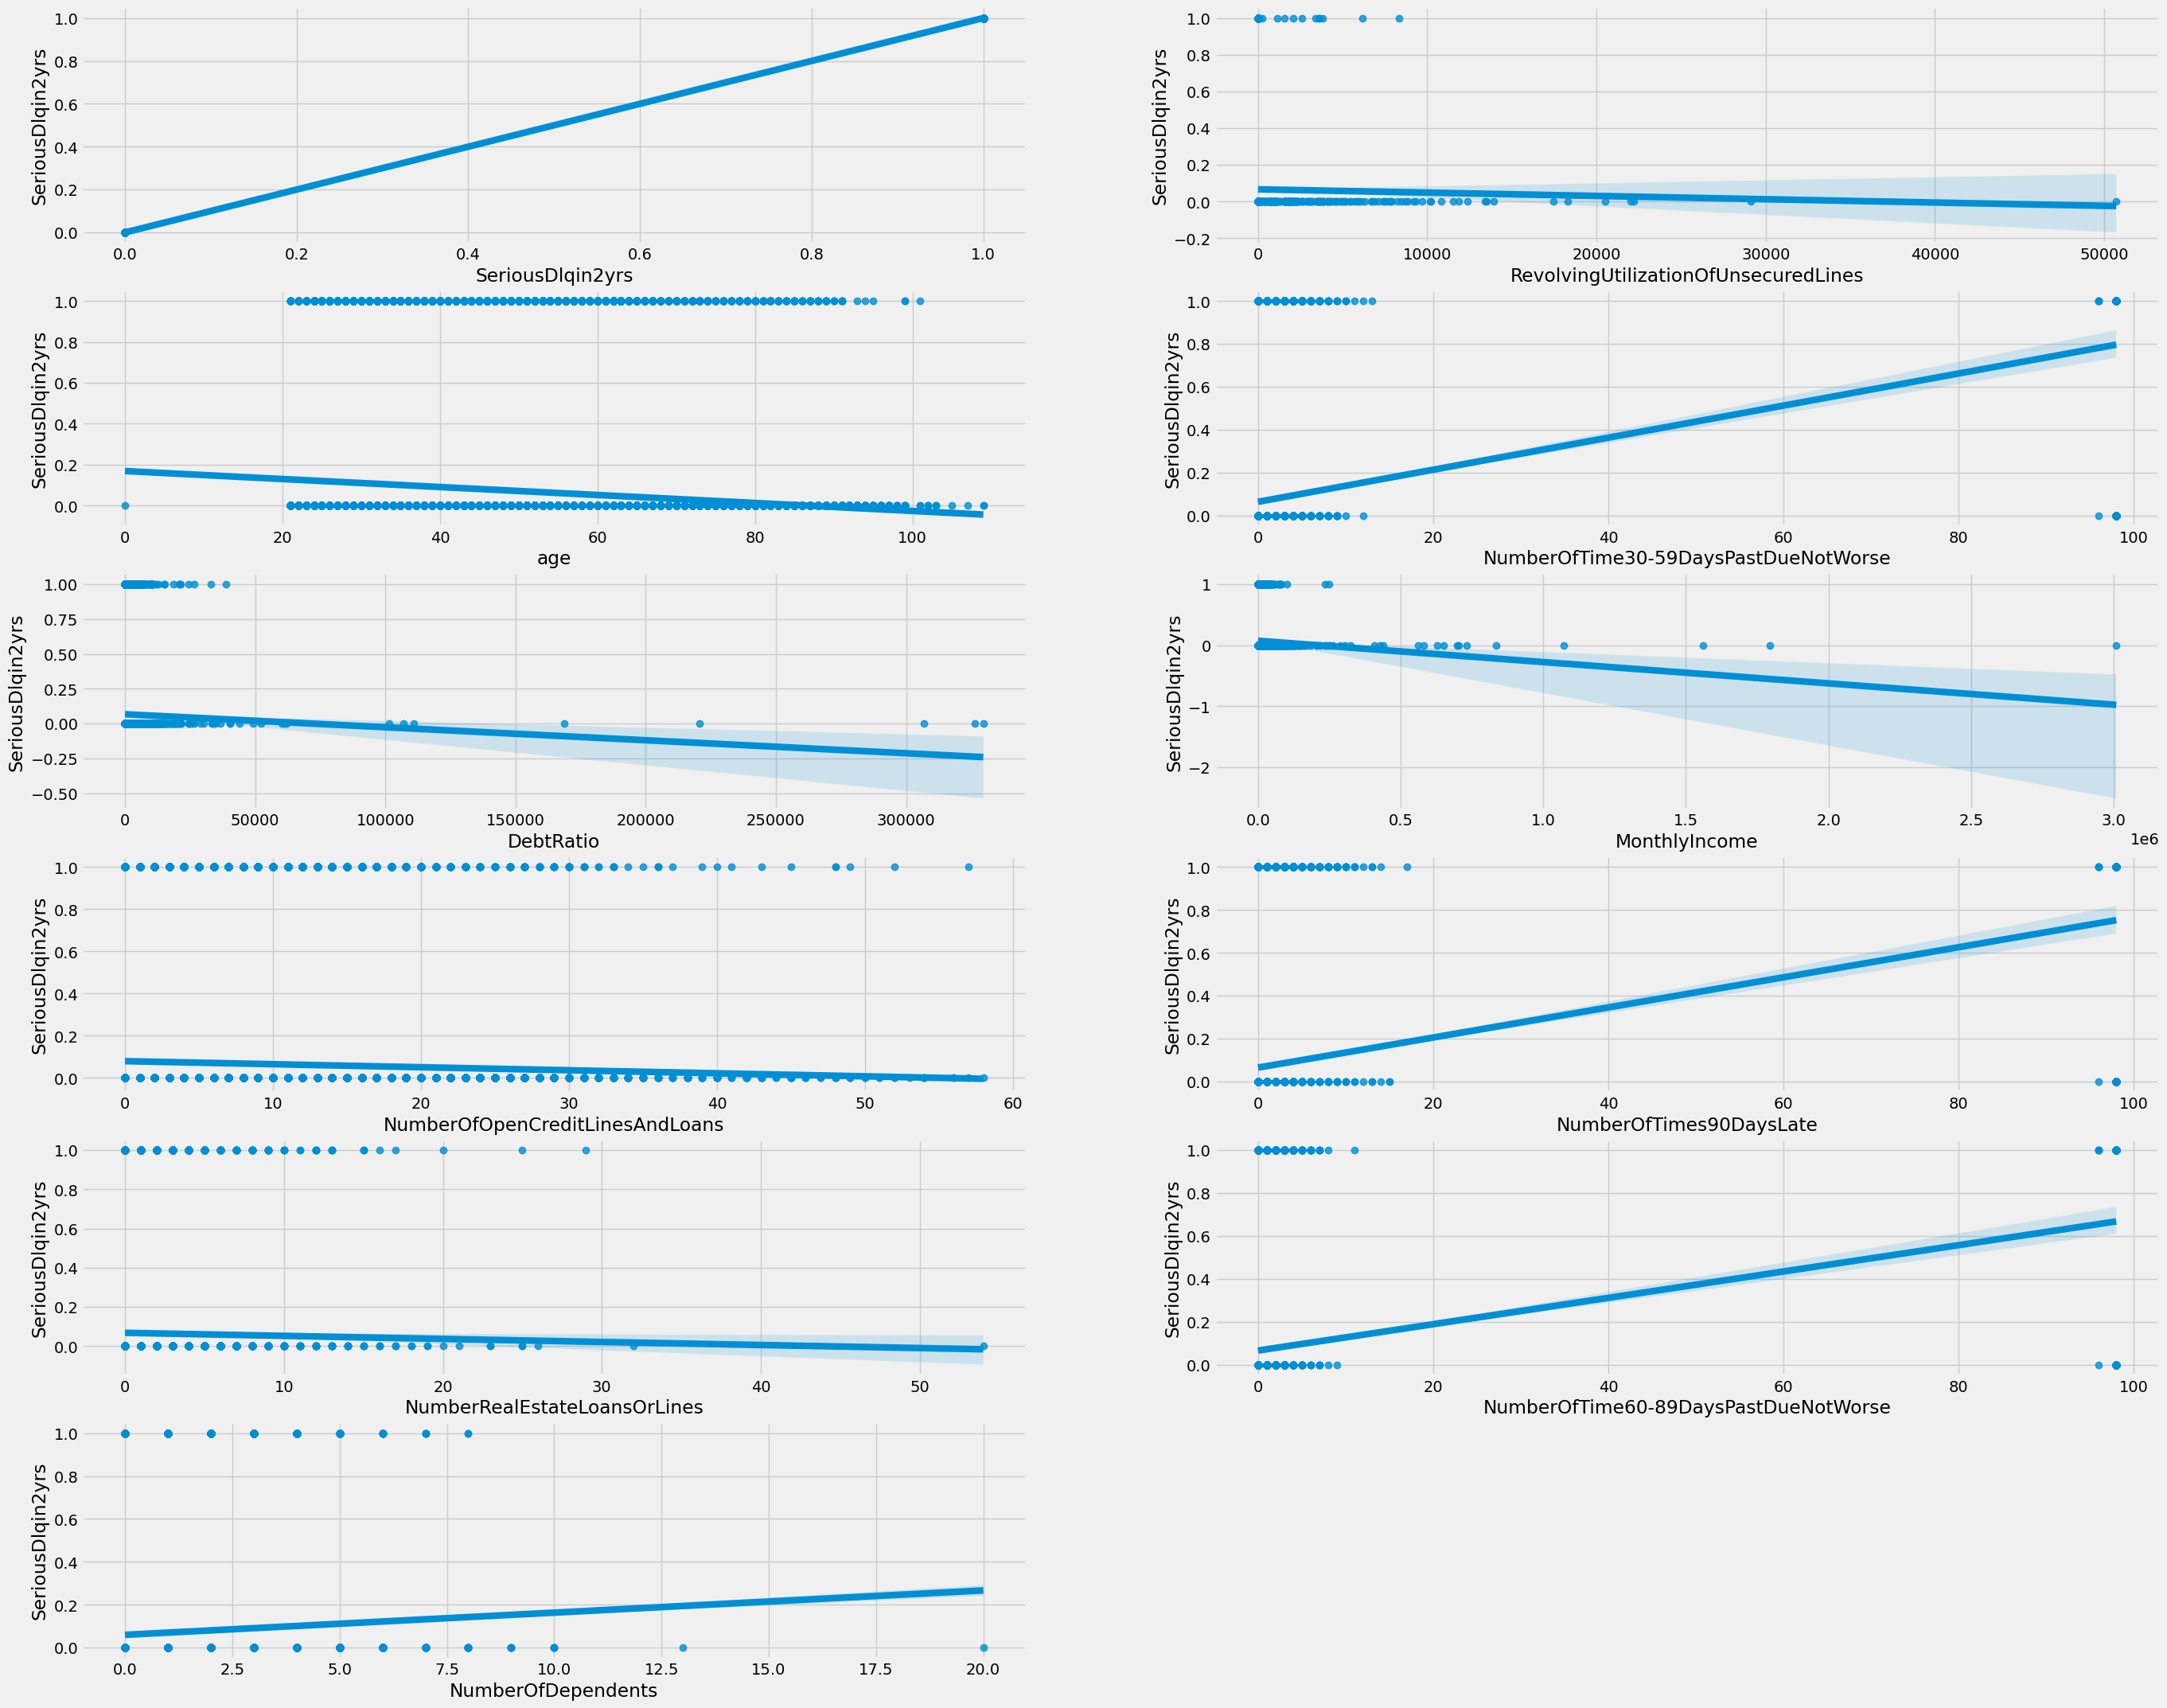

In [16]:
fig = plt.figure(figsize=[30,30])
for col,i in zip(train.columns,range(1,13)):
    axes = fig.add_subplot(7,2,i)
    sns.regplot(x= train[col],y = train.SeriousDlqin2yrs,ax=axes)
plt.show()

In [17]:
np.unique(train['NumberOfTime30-59DaysPastDueNotWorse'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 96, 98])

In [18]:
train.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [19]:
train[train['NumberOfTime30-59DaysPastDueNotWorse'] >= 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1733,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2286,0,1.0,22,98,0.0,NaN,0,98,0,98,0.0
3884,0,1.0,38,98,12.0,NaN,0,98,0,98,0.0
4417,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4705,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
147774,1,1.0,68,98,255.0,NaN,0,98,0,98,0.0
149153,1,1.0,24,98,54.0,NaN,0,98,0,98,0.0
149239,0,1.0,26,98,0.0,2000.0,0,98,0,98,0.0
149439,1,1.0,34,98,9.0,NaN,0,98,0,98,0.0


In [20]:
a = train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs'].sum()
a

147

In [21]:
b = len(train[train['NumberOfTime30-59DaysPastDueNotWorse'] >= 90]['SeriousDlqin2yrs'])

In [22]:
b

269

In [23]:
print("Unique values in '30-59 Days' values that are more than or equal to 90:",np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                          ['NumberOfTime30-59DaysPastDueNotWorse']))


print("Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90:",np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                                       ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90:",np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                                    ['NumberOfTimes90DaysLate']))


print("Unique values in '60-89 Days' when '30-59 Days' values are less than 90:",np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']<90]
                                                                                           ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are less than 90:",np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']<90]
                                                                                        ['NumberOfTimes90DaysLate']))


print("Proportion of positive class with special 96/98 values:",
      round(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs'].sum()*100/
      len(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs']),2),'%')

Unique values in '30-59 Days' values that are more than or equal to 90: [96 98]
Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '60-89 Days' when '30-59 Days' values are less than 90: [ 0  1  2  3  4  5  6  7  8  9 11]
Unique values in '90 Days' when '30-59 Days' values are less than 90: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]
Proportion of positive class with special 96/98 values: 54.65 %


From the above, it can be observed that the normal range for `'NumberOfTime30-59DaysPastDueNotWorse'` is `0 - 13`, **96 and 98* can be treated as human errors.

Same applies to `NumberOfTime60-89DaysPastDueNotWorse`, normal range is **0 - 11** while that `NumberOfTimes90DaysLate` is **0 - 17**. We therefore replace these values with their respective maximum.

In [24]:
train['NumberOfTime30-59DaysPastDueNotWorse'] = np.where(train['NumberOfTime30-59DaysPastDueNotWorse'] >= 90, 13, train['NumberOfTime30-59DaysPastDueNotWorse'])

train['NumberOfTime60-89DaysPastDueNotWorse'] = np.where(train['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 11, train['NumberOfTime60-89DaysPastDueNotWorse'])

train['NumberOfTimes90DaysLate'] = np.where(train['NumberOfTimes90DaysLate'] >= 90, 17, train['NumberOfTimes90DaysLate'])

In [25]:
print("Unique values in 30-59Days", np.unique(train['NumberOfTime30-59DaysPastDueNotWorse']))
print("Unique values in 60-89Days", np.unique(train['NumberOfTime60-89DaysPastDueNotWorse']))
print("Unique values in 90Days", np.unique(train['NumberOfTimes90DaysLate']))

Unique values in 30-59Days [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Unique values in 60-89Days [ 0  1  2  3  4  5  6  7  8  9 11]
Unique values in 90Days [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]


Similar analysis will be done for the test set

In [26]:
print("Unique values in '30-59 Days' values that are more than or equal to 90:",np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                          ['NumberOfTime30-59DaysPastDueNotWorse']))


print("Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90:",np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                                       ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90:",np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                                    ['NumberOfTimes90DaysLate']))


print("Unique values in '60-89 Days' when '30-59 Days' values are less than 90:",np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']<90]
                                                                                           ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are less than 90:",np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']<90]
                                                                                        ['NumberOfTimes90DaysLate']))

Unique values in '30-59 Days' values that are more than or equal to 90: [96 98]
Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '60-89 Days' when '30-59 Days' values are less than 90: [0 1 2 3 4 5 6 7 8 9]
Unique values in '90 Days' when '30-59 Days' values are less than 90: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 16 17 18]


In [27]:
test['NumberOfTime30-59DaysPastDueNotWorse'] = np.where(test['NumberOfTime30-59DaysPastDueNotWorse'] >= 90, 19, test['NumberOfTime30-59DaysPastDueNotWorse'])

test['NumberOfTime60-89DaysPastDueNotWorse'] = np.where(test['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 9, test['NumberOfTime60-89DaysPastDueNotWorse'])

test['NumberOfTimes90DaysLate'] = np.where(test['NumberOfTimes90DaysLate'] >= 90, 18, test['NumberOfTimes90DaysLate'])

print("Unique values in 30-59Days", np.unique(test['NumberOfTime30-59DaysPastDueNotWorse']))
print("Unique values in 60-89Days", np.unique(test['NumberOfTime60-89DaysPastDueNotWorse']))
print("Unique values in 90Days", np.unique(test['NumberOfTimes90DaysLate']))

Unique values in 30-59Days [ 0  1  2  3  4  5  6  7  8  9 10 11 12 19]
Unique values in 60-89Days [0 1 2 3 4 5 6 7 8 9]
Unique values in 90Days [ 0  1  2  3  4  5  6  7  8  9 10 11 12 16 17 18]


Next, we look at **`DebtRatio`** and **`RevolvingUtilizationOfUnsecuredLines`**

**Resolving Utilisation:** Your revolving utilization rate compares your credit debt to your total credit limit. To calculate it, divide your balance by your credit limit. Let’s say you have a $2,000 balance on a credit card with a $5,000 limit. Your utilization rate would be 40%. [Refrence](https://www.nationalfunding.com/blog/what-is-revolving-utilization-how-to-improve-it/#:~:text=Your%20revolving%20utilization%20rate%20compares,utilization%20rate%20would%20be%2040%25.)

In [28]:
print(f"Debt Ratio: \n {train['DebtRatio'].describe()}")
print(f"\nResolving Utilization of unsecured line: {train['RevolvingUtilizationOfUnsecuredLines'].describe()} ")

Debt Ratio: 
 count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

Resolving Utilization of unsecured line: count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64 


In [29]:
quantiles = [0.75,0.8,0.81,0.85,0.9,0.95,0.975,0.99]


for i in quantiles:
    print(f"{i*100} % quantile of debt ratio is: {train['DebtRatio'].quantile(i)}")

75.0 % quantile of debt ratio is: 0.86825377325
80.0 % quantile of debt ratio is: 4.0
81.0 % quantile of debt ratio is: 14.0
85.0 % quantile of debt ratio is: 269.1499999999942
90.0 % quantile of debt ratio is: 1267.0
95.0 % quantile of debt ratio is: 2449.0
97.5 % quantile of debt ratio is: 3489.024999999994
99.0 % quantile of debt ratio is: 4979.040000000037


As you can see there is over 1000% increase in quantile post 81%. We will try to investigate the reason for this.

In [30]:
train[train['DebtRatio'] >= train['DebtRatio'].quantile(0.95)][['SeriousDlqin2yrs', 'MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,7501.000000,379.000000
mean,0.055193,0.084433
std,0.228371,0.278403
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


From the above the following observation can be inferred

- Out of 7501 customers who have their debt ratio greater than their income, only 379 (representing 5%) have monthly income
- Also, min monthly income is 0, max 1. This just means could be as a result of human error. 

Let's check if Serious Delinquency in 2 years and Monthly Income values are equal.

In [31]:
train[(train['DebtRatio'] > train['DebtRatio'].quantile(0.95)) & (train['SeriousDlqin2yrs'] == train['MonthlyIncome'])]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
50,0,0.818978,73,0,3095.0,0.0,9,0,1,1,0.0
73,0,0.059669,31,0,3162.0,0.0,11,0,2,0,1.0
90,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
326,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0
508,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
147523,0,0.666509,50,0,4351.0,0.0,12,0,2,0,2.0
148258,0,0.211955,31,0,2734.0,0.0,9,0,1,0,1.0
148432,0,0.091785,37,0,2752.0,0.0,7,0,2,0,3.0
149383,0,0.239302,63,0,3153.0,0.0,29,0,1,0,0.0


331 of 379 have monthly income equals to Serious Delinquency in 2 years. Therefore, we treat 331 as outlier and remove them. 

In [32]:
train = train[ - ((train['DebtRatio'] > train['DebtRatio'].quantile(0.95)) & (train['SeriousDlqin2yrs'] == train['MonthlyIncome']))]

In [33]:
train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


### Revolving Utilization of Unsecured Lines

Your revolving utilization ratio compares your credit debt to your total credit limit. To calculate it, divide your balance by your credit limit. Let’s say you have a $2,000 balance on a credit card with a $5,000 limit. Your utilization ratio is 0.4. 

A Ratio of 10 functionally also seems possible, let's see how many of these customers have the Revolving Utilization of Unsecured Lines greater than 10.

In [34]:
train[train['RevolvingUtilizationOfUnsecuredLines'] > 10].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,173.00000,241.000000,241.000000,241.000000,241.000000,228.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,8467.67052,5.763485,0.074689,1.186722,0.087137,0.688596
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,6564.06825,3.114160,0.579711,1.065750,0.559651,1.038659
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,4500.00000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,7000.00000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,10091.00000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.00000,21.000000,8.000000,9.000000,7.000000,4.000000


In [35]:
train[train['RevolvingUtilizationOfUnsecuredLines']>13].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,238.000000,238.000000,238.000000,238.000000,238.000000,170.000000,238.000000,238.000000,238.000000,238.000000,225.000000
mean,0.058824,3608.797826,50.634454,0.163866,579.117900,8520.041176,5.689076,0.071429,1.176471,0.071429,0.693333
std,0.235790,5140.423232,14.617658,0.522123,1782.962163,6606.889618,3.032170,0.580214,1.064558,0.542637,1.043346
min,0.000000,14.000000,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,951.000000,39.000000,0.000000,0.216587,4608.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2023.500000,48.000000,0.000000,0.391176,7000.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4128.750000,62.000000,0.000000,82.250000,10178.750000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [36]:
train = train[train['RevolvingUtilizationOfUnsecuredLines'] <= 13]

train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


### Handling Null Values

In [37]:
def nullValuesPct(df):
    '''
    Function to calculate percentage of null values
    '''
    nullPct = df.isnull().sum() * 100 / len(df)
    df_Missing = pd.DataFrame({'Pct_Null_Values': nullPct})
    df_Missing.sort_values(by = 'Pct_Null_Values', ascending=False, inplace = True)
    return df_Missing[df_Missing['Pct_Null_Values'] > 0]


nullValuesPct(train)


,Pct_Null_Values
MonthlyIncome,19.850633
NumberOfDependents,2.617261


There are missing values in the Monthly Income and Number of Dependents coulumns. Let's fill this with median and zero respectively

In [38]:
median_income_train = train['MonthlyIncome'].median()
median_income_train

5400.0

In [39]:
train['MonthlyIncome'].fillna(train['MonthlyIncome'].median(), inplace = True)
train['NumberOfDependents'].fillna(0, inplace= True)

In [40]:
nullValuesPct(train)

,Pct_Null_Values


Let's handle null values for our test data

In [41]:
nullValuesPct(test)

,Pct_Null_Values
MonthlyIncome,19.805326
NumberOfDependents,2.587116


In [42]:
median_income_test = test['MonthlyIncome'].median()
median_income_test

5400.0

In [43]:
test['MonthlyIncome'].fillna(test['MonthlyIncome'].median(), inplace=True)
test['NumberOfDependents'].fillna(0, inplace=True)

In [44]:
nullValuesPct(test)

,Pct_Null_Values


In [45]:
print(train.shape)
print(test.shape)

(149431, 11)
(101503, 10)


### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix (Hearmap')

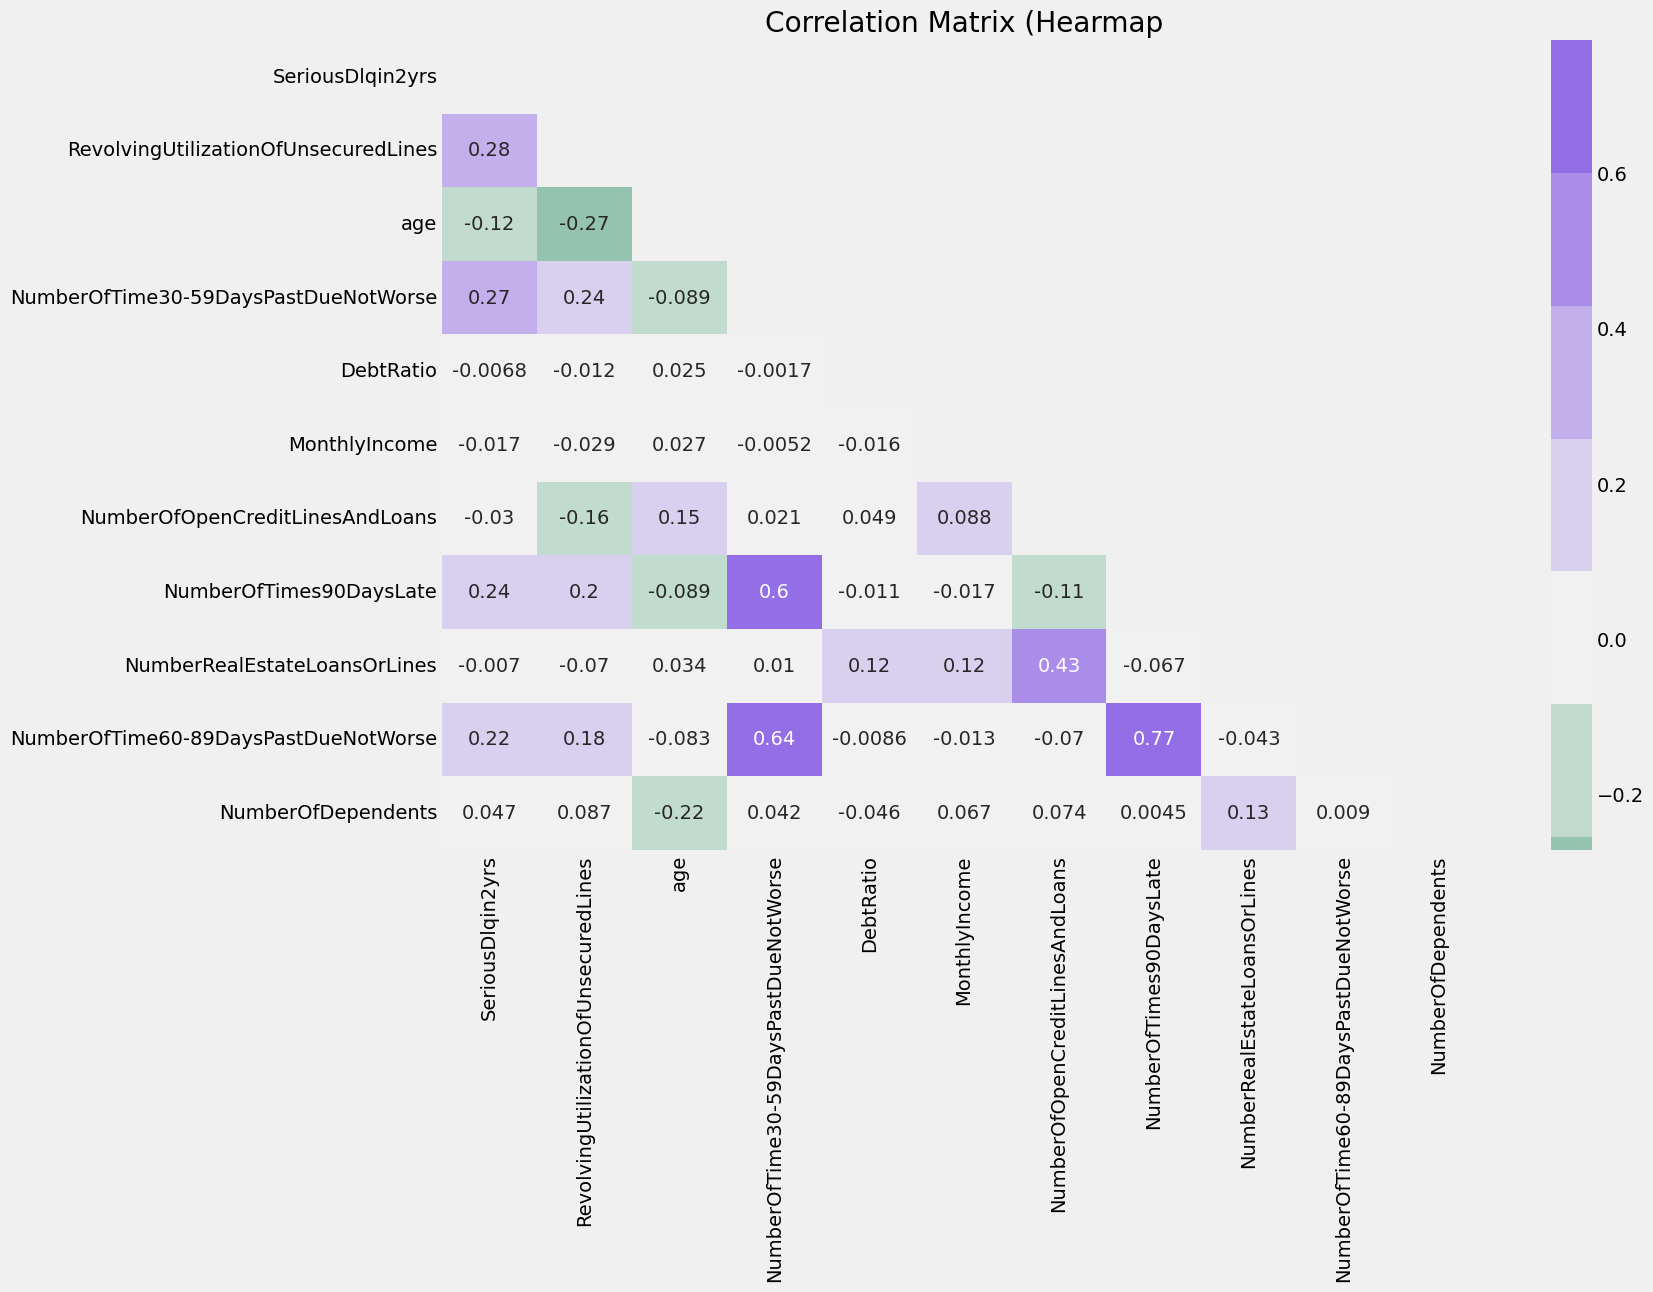

In [46]:
fig = plt.figure(figsize = [15, 10])
mask = np.zeros_like(train.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train.corr(), cmap = sns.diverging_palette(150, 275, s = 80, l =55, n = 9), mask = mask, annot = True, center = 0)
plt.title('Correlation Matrix (Hearmap')

In [47]:
train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

From the correlation heatmap above, we can infer that the most correlated features to **SeriousDlqin2yrs** are **NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse** 

# Feature Engineering 

Let's combine the train and test sets to create more fearures

In [48]:
SeriousDlqin2yrs = train['SeriousDlqin2yrs']

train.drop('SeriousDlqin2yrs', axis = 1, inplace=True)

In [49]:
mergedData = pd.concat([train, test])

mergedData.shape

(250934, 10)

In [50]:
mergedData.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Adding some new features:

- **MonthlyIncomePerPerson**: Monthly Income divided by the number of dependents

- **MonthlyDebt**: Monthly Income multiplied by the Debt Ratio

- **isRetired**: Person whose monthly income is 0 and age is greater than 65 (Assumed Retirement Age)

- **RevolvingLines**: Difference between Number of Open Credit Lines and Loans and Number of Real Estate Lines and Loans

- **hasRevolvingLines**: If RevolvingLines exists then 1 else 0

- **hasMultipleRealEstates**: If the Number of Real Estates is greater than 2

- **incomeDivByThousand**: Monthly Income divided by 1000. Fraud might be more likely for these or it might signal the person is in a new job and hasn’t had a percent raise in pay yet. Both groups signal higher risk.


In [51]:
mergedData['MonthlyIncomePerPerson'] = mergedData['MonthlyIncome'] / (mergedData['NumberOfDependents'] + 1)

# mergedData['MonthlyIncomePerPerson'].fillna(0, inplace = True)

mergedData['MonthlyDebt'] = mergedData['MonthlyIncome'] * mergedData['DebtRatio']

# mergedData['MonthlyDebt'].fillna(mergedData['DebtRatio'], inplace=True)

# mergedData['MonthlyDebt'] = np.where(mergedData['MonthlyDebt'] == 0, mergedData['DebtRatio'], mergedData['MonthlyDebt'])

mergedData['isRetired'] = np.where((mergedData['age'] > 65), 1, 0)

mergedData['RevolvingLines'] = mergedData['NumberOfOpenCreditLinesAndLoans'] - mergedData['NumberRealEstateLoansOrLines']

mergedData['hasRevolvingLines'] = np.where((mergedData['RevolvingLines'] > 0), 1, 0)

mergedData['hasMultipleRealEstates'] = np.where((mergedData['NumberRealEstateLoansOrLines'] >=2), 1, 0)

mergedData['incomeDivByThousand'] = mergedData['MonthlyIncome'] /1000

In [52]:
mergedData['MonthlyDebt'].fillna(mergedData['DebtRatio'], inplace=True)

mergedData['MonthlyDebt'] = np.where(mergedData['MonthlyDebt'] == 0, mergedData['DebtRatio'], mergedData['MonthlyDebt'])


In [53]:
mergedData.shape

(250934, 17)

In [54]:
nullValuesPct(mergedData)

,Pct_Null_Values


### Skewness check and Box Cox Transformation

Let's check the distribution of each features

In [55]:
columnList = list(mergedData.columns)

columnList

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'MonthlyIncomePerPerson',
 'MonthlyDebt',
 'isRetired',
 'RevolvingLines',
 'hasRevolvingLines',
 'hasMultipleRealEstates',
 'incomeDivByThousand']

In [59]:
mergedData['age'].mean()

52.3441622099835

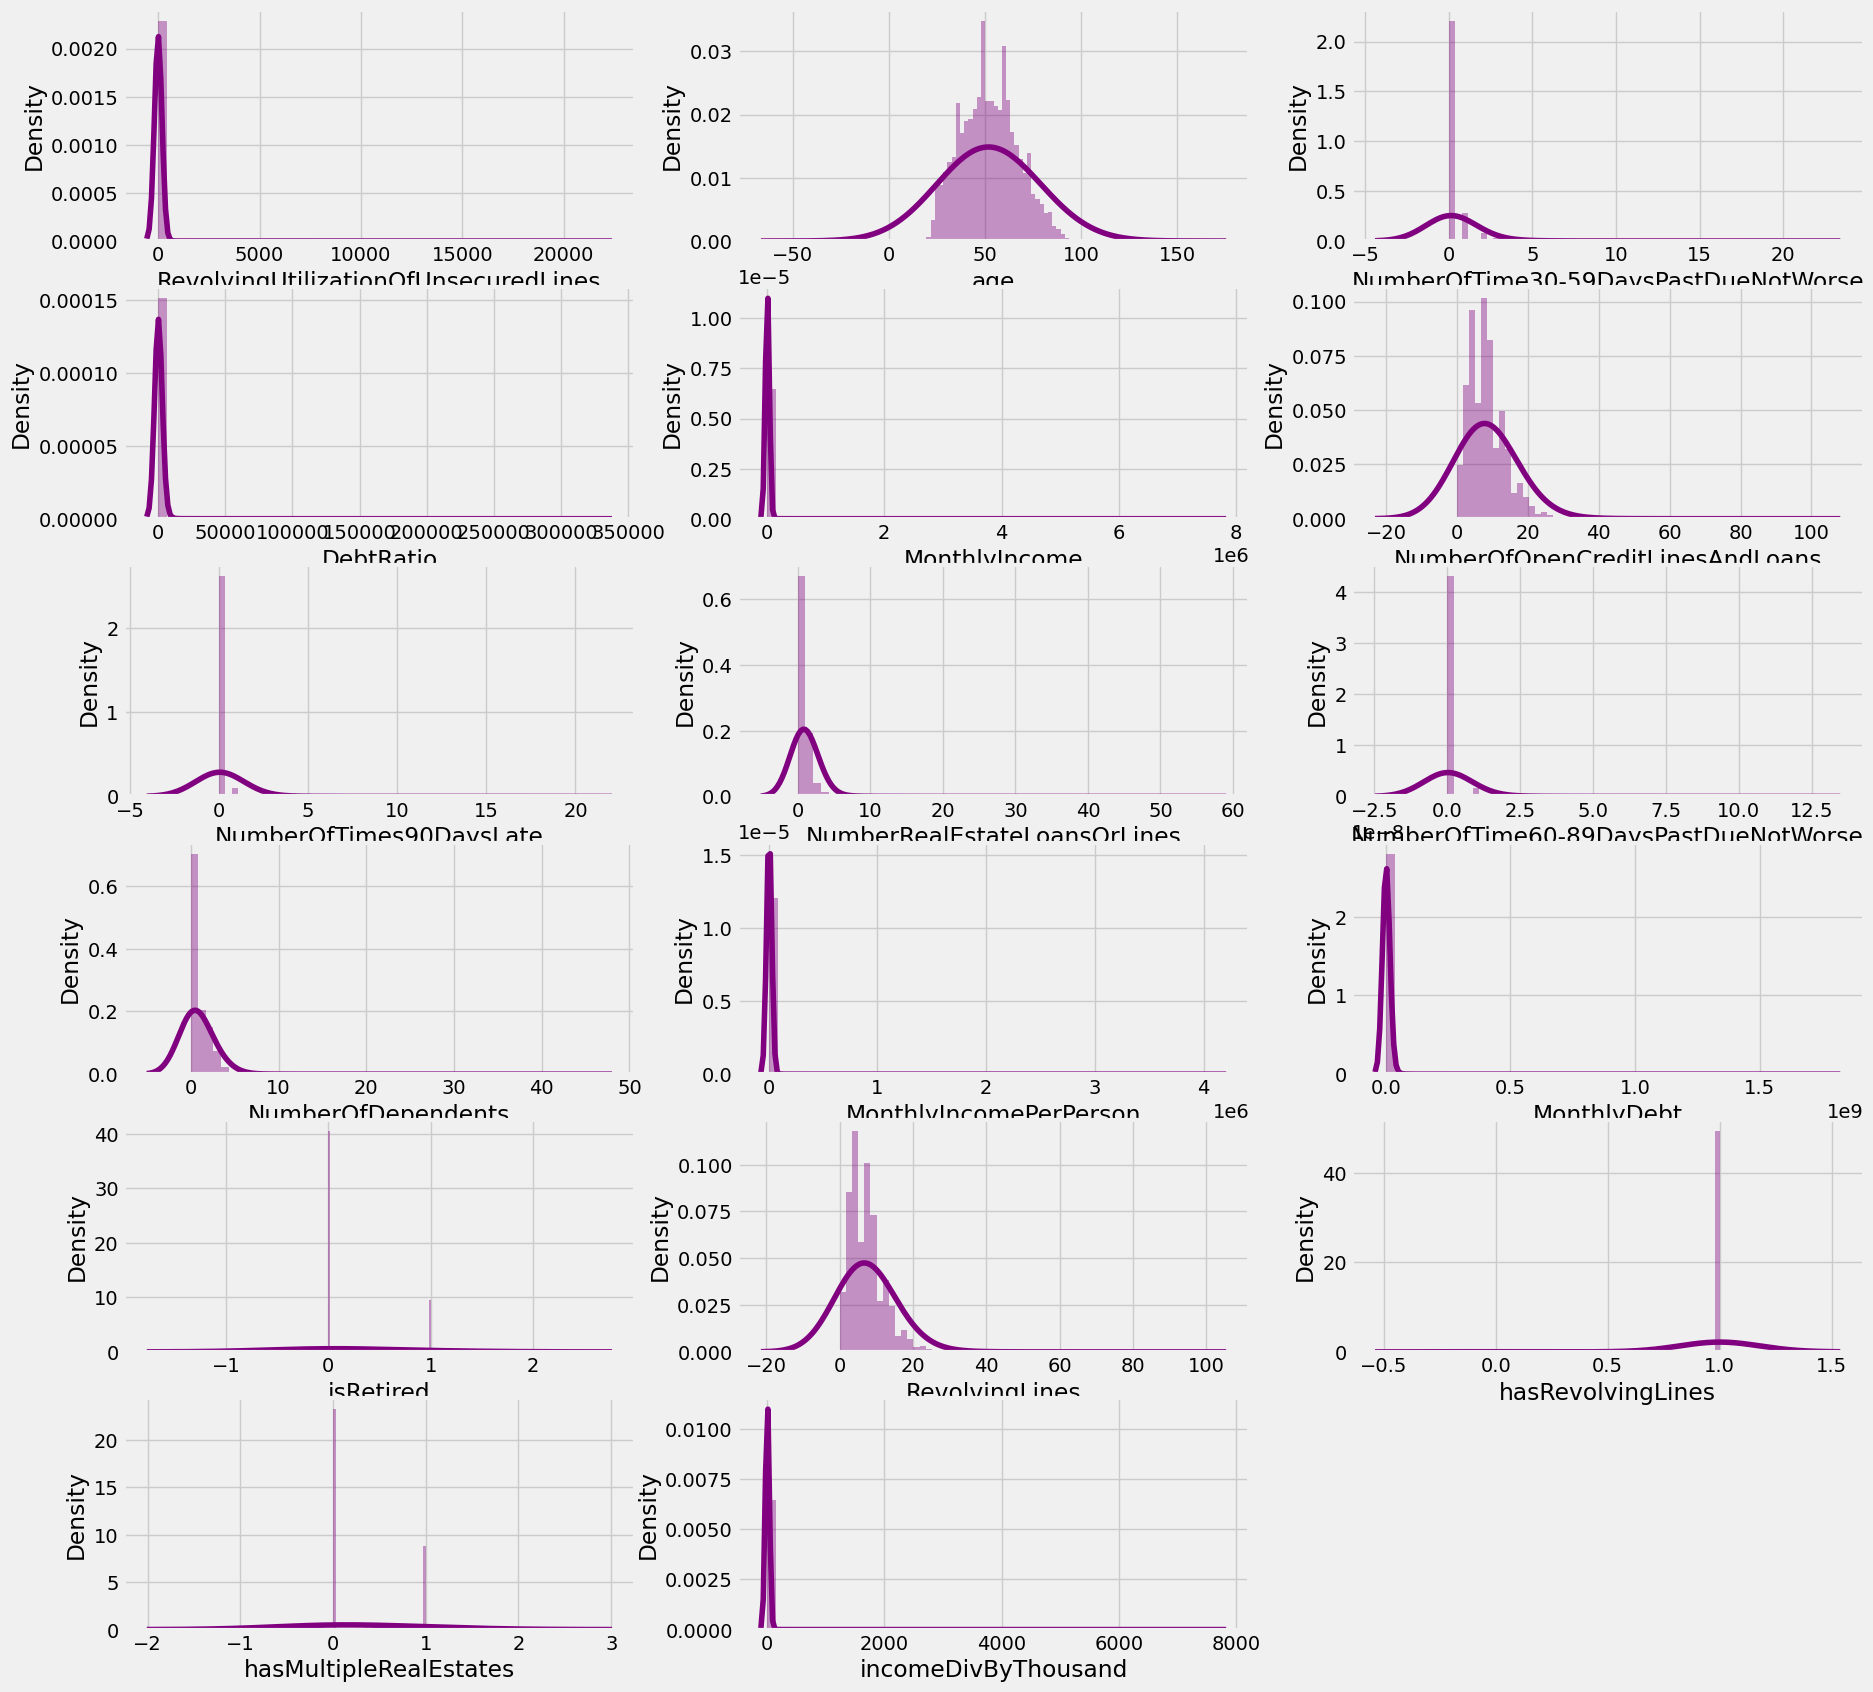

In [58]:
fig = plt.figure(figsize=[20, 20])
for col, index in zip(columnList, range(1, 19)):
    axes = fig.add_subplot(6, 3, index)
    sns.distplot(mergedData[col], ax=axes, kde_kws={'bw':1.5}, color='purple')

plt.show()

From the above we see that most of the features are skewed to either directions. Only age is close to a normal distribution. Let's check for how skewness value for each features. 

#### How skewness could affect training model
- Bad model: Your learned classifier will not be able to do its task (identify the proper class).
- Inefficient training: The training process will invest a lot of time and effort in tuning "uninteresting parameters", as they seem to discriminate between the classes.
- Missing good features and emphasizing useless features

[Refrence](https://qr.ae/pv3A5R)
